In [39]:
#importeren van modules
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#constantes
k  = 1.0565    #[N/m]  veerconstante
m  = 4.2818e-9     #[kg]   massa
y  = 1.9217e-06  #[kg/s] dempingsfactor
pi = np.pi

Fmax = 60e-9    #[N]    maximale kracht


In [58]:
#definieren van de resonantie frequentie (inclusief frequenties om te controleren wat er gebeurd), trillingstijd, tijdsstap en hoeveelheid stappen
#f = (1/(5*pi))*(k/m)**0.5      #[Hz]   lagere frequentie dan de resonantie frequentie 
#f = (k/m)**0.5                 #[Hz]   hogere frequentie dan de resonantie frequentie
f = (1/(2*pi))*((k/m))**0.5     #[Hz]   resonantie frequentie
T = 1/f                         #[s]    trillingstijd
dt = T/40                       #[s]    tijdstapgrootte
h = 4000                        #[-]    hoeveelheid stappen

999.9953287802116

In [59]:
#functie voor het maken van lijsten
def listmaker(q):
    Q = np.zeros(q)
    
    Q[0] = 0
    Q[1] = 0
    return Q


In [60]:
#definiëren van de tijd
t  = listmaker(h)
for i in range(h-1):
    t[i+1] = t[i] + dt
    
#definiëren van de kracht
F  = listmaker(h)
for i in range(h-1):
    F[i] = Fmax*np.sin(2*pi*f*t[i])

In [61]:
#aanmaken van de constantes voor de differentiaal vergelijkingen
a = (2*dt**2)/(2*m+y*dt)          #[k]
b = (-2*k*dt**2+4*m)/(2*m+y*dt)
c = (y*dt-2*m)/(2*m+y*dt)

In [62]:
#definiëren van de uitwijking bij een varierende kracht
x  = listmaker(h)
for i in range(h-2):
    x[i+2] = a*F[i+1] + b*x[i+1] + c*x[i]

#definiëren van de uitwijking bij een constante kracht
x2 = listmaker(h)
for i in range(h-2):
    x2[i+2] = a*Fmax + b*x2[i+1] + c*x2[i]

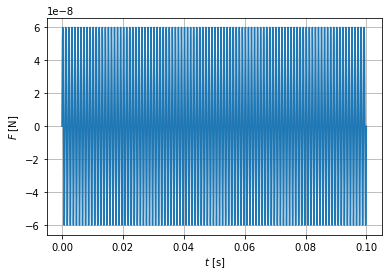

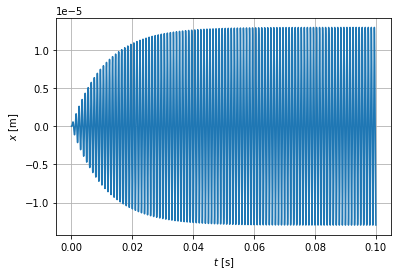

Q-factor = 34.96468509027932


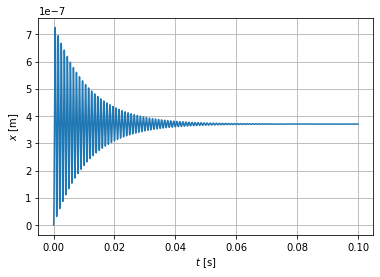

In [63]:
#aanmaken van de plots
plt.plot(t,F, label='F')
plt.grid()
plt.ylabel('$F$ [N]')
plt.xlabel('$t$ [s]')
#plt.xlim(0,0.001)
#plt.legend()
plt.show()

plt.plot(t,x, label='x')
plt.grid()
plt.ylabel('$x$ [m]')
plt.xlabel('$t$ [s]')
#plt.xlim(0,0.01)
plt.show()

plt.plot(t,x2)
plt.grid()
plt.ylabel('$x$ [m]')
plt.xlabel('$t$ [s]')
#plt.xlim(0.14,0.15)
#plt.ylim(3.706e-7,3.708e-7)

xmax = max(x[2500:3000])
x2max = x2[2999]
Qfactor = xmax/x2max
print('Q-factor =',Qfactor)

In [64]:
#waardes en lijsten voor het vinden van alle amplitudes
j  = 1
f2 = []
A  = []

#while loop om alle amplitudes per frequentie te verkrijgen zodat de FWHM-curve kan worden weergegeven
while j <= 2000:
    F2  = listmaker(h)
    for i in range(h-1):
        F2[i] = Fmax*np.sin(2*pi*j*t[i])
        
    x3  = listmaker(h)
    for i in range(h-2):
        x3[i+2] = a*F2[i+1] + b*x3[i+1] + c*x3[i]
    xmax = max(x3[3500:3999])
    A.append(xmax)
    f2.append(j)
    j+=1

Text(0.5, 1.0, 'FWHM curve van de drive mode')

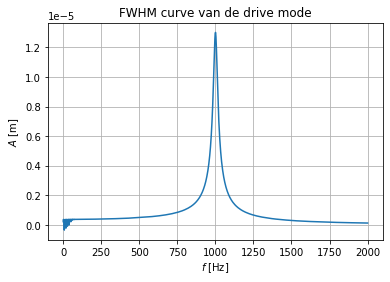

In [66]:
#plotten van de FWHM-curve
plt.plot(f2, A)
plt.grid()
plt.ylabel('$A$ [m]')
plt.xlabel('$f$ [Hz]')
plt.title('FWHM curve van de drive mode')

In [83]:
#verkrijgen en printen van de top van de FWHM-curve
maxA = max(A)
print('max A =',maxA,'m')

#verkrijgen van de hoogte van de FWHM lijn en de indices die waardes boven de lijn hebben
FWHMvalue = maxA/2
FWHMind = np.nonzero(A >= FWHMvalue)

#verkrijgen en printen van de breedte van FWHM
FWHMlen = f2[1024] - f2[975]
print('breedte van FWHM =',FWHMlen,'Hz')

#verkrijgen en printen van de procentuele verhouding tussen FWHM en v0
percentage = (FWHMlen/f)*100
print('percentage verhouding', 'FWHM/v0 =',percentage,'%')

max A = 1.3012898287592341e-05 m
breedte van FWHM = 49 Hz
percentage verhouding FWHM/v0 = 4.900022889083884 %
